In [16]:
!pip install kaggle
!pip install tqdm
!pip install np_utils

In [17]:
ls -a

./   .cache/   datalab/   .ipython/  .keras/  .rnd
../  .config/  .forever/  .kaggle/   .local/


In [18]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [19]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!mv kaggle.json ./.kaggle

In [21]:

!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 97%|███████████████████████████████████████▋ | 263M/271M [00:01<00:00, 158MB/s]
100%|█████████████████████████████████████████| 271M/271M [00:01<00:00, 155MB/s]
100%|████████████████████████████████████████▊| 541M/544M [00:03<00:00, 132MB/s]
100%|█████████████████████████████████████████| 544M/544M [00:03<00:00, 167MB/s]
  0%|                                                | 0.00/111k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 111k/111k [00:00<00:00, 110MB/s]


In [0]:
!mv ./.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/* ./

In [0]:
!unzip -q train.zip

In [0]:
!unzip -q test.zip

In [25]:
ls -a

./       .config/   .ipython/  .local/                test/     train.zip
../      datalab/   .kaggle/   .rnd                   test.zip
.cache/  .forever/  .keras/    sample_submission.csv  train/


In [0]:
import os
import skimage
from skimage import data,transform
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from keras import applications
from keras.models import Model
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.metrics import categorical_accuracy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,History
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import cv2
from tqdm import tqdm
from scipy.misc import imresize

In [0]:
def crop_to_square(img):
    if img.shape[0] > img.shape[1]:
        extra = (img.shape[0] - img.shape[1])
        if extra % 2 == 0:
            crop = img[extra // 2:-extra // 2, :]
        else:
            crop = img[max(0, extra // 2 + 1):min(-1, -(extra // 2)), :]
    elif img.shape[1] > img.shape[0]:
        extra = (img.shape[1] - img.shape[0])
        if extra % 2 == 0:
            crop = img[:, extra // 2:-extra // 2]
        else:
            crop = img[:, max(0, extra // 2 + 1):min(-1, -(extra // 2))]
    else:
        crop = img
    return crop

In [28]:
ROOT_PATH = "/content"
data_directory = os.path.join(ROOT_PATH, "train")

labels = []
X_train = []
   
file_names = os.listdir(data_directory)
for f in tqdm(file_names):
  img=plt.imread(os.path.join(data_directory,f))
  labels.append(f[0:3])
  crop = crop_to_square(img)
  rsz = imresize(crop, size=(64,64))
  X_train += [rsz]


  0%|          | 0/25000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):
 12%|█▏        | 2986/25000 [00:16<02:00, 182.36it/s]

100%|██████████| 25000/25000 [02:16<00:00, 182.62it/s]


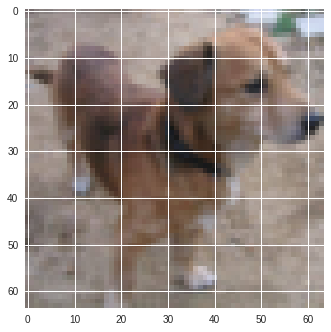

In [29]:
plt.imshow(X_train[1])

In [0]:
X_train=np.array(X_train)

              total        used        free      shared  buff/cache   available
Mem:          13029        1081         153         247       11794       11452
Swap:             0           0           0
dog


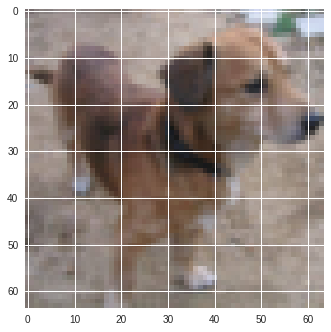

In [31]:
!free -m
plt.imshow(X_train[1])
print(labels[1])
X_train,labels=shuffle(X_train,labels,random_state=42)

dog


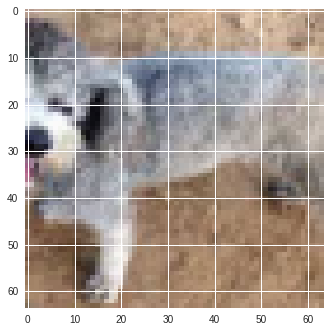

In [32]:
plt.imshow(X_train[1])
print(labels[1])


In [69]:
en=LabelEncoder()
encoder=en.fit(labels)
y_train=encoder.transform(labels)
print(encoder.transform(['dog','cat']))
#y_train= to_categorical(encoded)
print(y_train[:10])

[1 0]
[1 1 0 1 1 0 1 0 1 1]


In [0]:
input_shape=(64,64,3)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape,padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(128, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(256, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(256, (5, 5),strides=(2,2), activation='relu',padding='valid'))
model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Conv2D(512, (5, 5),strides=(2,2), activation='relu',padding='same'))
model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Conv2D(512, (5, 5),strides=(2,2), activation='relu',padding='same'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))

In [72]:
optimizer=optimizers.adam(lr=0.001)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['binary_accuracy'])
train_model=model.fit(X_train,y_train,validation_split=0.1,epochs=30,batch_size=32)

Train on 22500 samples, validate on 2500 samples
Epoch 1/30
20416/22500 [==========================>...] - ETA: 10s - loss: 0.7841 - binary_accuracy: 0.5955

22500/22500 [==============================] - 114s 5ms/step - loss: 0.7705 - binary_accuracy: 0.6032 - val_loss: 0.7661 - val_binary_accuracy: 0.5100
Epoch 2/30
11552/22500 [==============>...............] - ETA: 51s - loss: 0.6283 - binary_accuracy: 0.6736

22500/22500 [==============================] - 109s 5ms/step - loss: 0.6050 - binary_accuracy: 0.6844 - val_loss: 0.6150 - val_binary_accuracy: 0.6608
Epoch 3/30
 8256/22500 [==========>...................] - ETA: 1:07 - loss: 0.5539 - binary_accuracy: 0.7207

22500/22500 [==============================] - 109s 5ms/step - loss: 0.5403 - binary_accuracy: 0.7301 - val_loss: 0.5850 - val_binary_accuracy: 0.7024
Epoch 4/30
 7040/22500 [========>.....................] - ETA: 1:13 - loss: 0.5031 - binary_accuracy: 0.7560

22500/22500 [==============================] - 109s 5ms/step - loss: 0.5001 - binary_accuracy: 0.7560 - val_loss: 0.6649 - val_binary_accuracy: 0.6840
Epoch 5/30
 6592/22500 [=======>......................] - ETA: 1:15 - loss: 0.4676 - binary_accuracy: 0.7831

22500/22500 [==============================] - 109s 5ms/step - loss: 0.4596 - binary_accuracy: 0.7838 - val_loss: 0.4849 - val_binary_accuracy: 0.7704
Epoch 6/30
 6400/22500 [=======>......................] - ETA: 1:16 - loss: 0.4203 - binary_accuracy: 0.8083

22500/22500 [==============================] - 109s 5ms/step - loss: 0.4180 - binary_accuracy: 0.8092 - val_loss: 0.4684 - val_binary_accuracy: 0.7772
Epoch 7/30
 6336/22500 [=======>......................] - ETA: 1:16 - loss: 0.3947 - binary_accuracy: 0.8217

22500/22500 [==============================] - 109s 5ms/step - loss: 0.3829 - binary_accuracy: 0.8266 - val_loss: 0.6449 - val_binary_accuracy: 0.7120
Epoch 8/30
 6304/22500 [=======>......................] - ETA: 1:16 - loss: 0.3462 - binary_accuracy: 0.8436

22500/22500 [==============================] - 109s 5ms/step - loss: 0.3508 - binary_accuracy: 0.8430 - val_loss: 0.7758 - val_binary_accuracy: 0.6300
Epoch 9/30
 6304/22500 [=======>......................] - ETA: 1:16 - loss: 0.3131 - binary_accuracy: 0.8620

22500/22500 [==============================] - 109s 5ms/step - loss: 0.3202 - binary_accuracy: 0.8579 - val_loss: 0.3555 - val_binary_accuracy: 0.8488
Epoch 10/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.3296 - binary_accuracy: 0.8563

22500/22500 [==============================] - 109s 5ms/step - loss: 0.3135 - binary_accuracy: 0.8633 - val_loss: 0.6469 - val_binary_accuracy: 0.6780
Epoch 11/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.2820 - binary_accuracy: 0.8819

22500/22500 [==============================] - 109s 5ms/step - loss: 0.2836 - binary_accuracy: 0.8812 - val_loss: 0.2932 - val_binary_accuracy: 0.8808
Epoch 12/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.2659 - binary_accuracy: 0.8830

22500/22500 [==============================] - 109s 5ms/step - loss: 0.2663 - binary_accuracy: 0.8856 - val_loss: 0.2855 - val_binary_accuracy: 0.8768
Epoch 13/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.2627 - binary_accuracy: 0.8927

22500/22500 [==============================] - 109s 5ms/step - loss: 0.2525 - binary_accuracy: 0.8955 - val_loss: 0.3639 - val_binary_accuracy: 0.8348
Epoch 14/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.2334 - binary_accuracy: 0.9019

22500/22500 [==============================] - 109s 5ms/step - loss: 0.2401 - binary_accuracy: 0.8993 - val_loss: 0.3573 - val_binary_accuracy: 0.8484
Epoch 15/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.2398 - binary_accuracy: 0.8997

22500/22500 [==============================] - 109s 5ms/step - loss: 0.2307 - binary_accuracy: 0.9037 - val_loss: 0.2455 - val_binary_accuracy: 0.8960
Epoch 16/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.2254 - binary_accuracy: 0.9085

22500/22500 [==============================] - 109s 5ms/step - loss: 0.2251 - binary_accuracy: 0.9074 - val_loss: 0.2388 - val_binary_accuracy: 0.8996
Epoch 17/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.2021 - binary_accuracy: 0.9203

22500/22500 [==============================] - 109s 5ms/step - loss: 0.2137 - binary_accuracy: 0.9129 - val_loss: 0.2850 - val_binary_accuracy: 0.8736
Epoch 18/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.1989 - binary_accuracy: 0.9193

22500/22500 [==============================] - 109s 5ms/step - loss: 0.2012 - binary_accuracy: 0.9164 - val_loss: 0.2579 - val_binary_accuracy: 0.8852
Epoch 19/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.1993 - binary_accuracy: 0.9201

22500/22500 [==============================] - 109s 5ms/step - loss: 0.2000 - binary_accuracy: 0.9191 - val_loss: 0.2200 - val_binary_accuracy: 0.9136
Epoch 20/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.1811 - binary_accuracy: 0.9259

22500/22500 [==============================] - 109s 5ms/step - loss: 0.1890 - binary_accuracy: 0.9230 - val_loss: 0.3097 - val_binary_accuracy: 0.8636
Epoch 21/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.1686 - binary_accuracy: 0.9322

22500/22500 [==============================] - 109s 5ms/step - loss: 0.1801 - binary_accuracy: 0.9269 - val_loss: 0.2380 - val_binary_accuracy: 0.8968
Epoch 22/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.1629 - binary_accuracy: 0.9349

22500/22500 [==============================] - 109s 5ms/step - loss: 0.1730 - binary_accuracy: 0.9314 - val_loss: 0.3381 - val_binary_accuracy: 0.8588
Epoch 23/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.1631 - binary_accuracy: 0.9361

22500/22500 [==============================] - 109s 5ms/step - loss: 0.1652 - binary_accuracy: 0.9344 - val_loss: 0.2042 - val_binary_accuracy: 0.9188
Epoch 24/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.1668 - binary_accuracy: 0.9306

22500/22500 [==============================] - 109s 5ms/step - loss: 0.1659 - binary_accuracy: 0.9316 - val_loss: 0.2173 - val_binary_accuracy: 0.9088
Epoch 25/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.1434 - binary_accuracy: 0.9434

22500/22500 [==============================] - 109s 5ms/step - loss: 0.1544 - binary_accuracy: 0.9376 - val_loss: 0.2477 - val_binary_accuracy: 0.9004
Epoch 26/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.1459 - binary_accuracy: 0.9464

22500/22500 [==============================] - 109s 5ms/step - loss: 0.1570 - binary_accuracy: 0.9385 - val_loss: 0.2908 - val_binary_accuracy: 0.8768
Epoch 27/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.1410 - binary_accuracy: 0.9416

22500/22500 [==============================] - 109s 5ms/step - loss: 0.1512 - binary_accuracy: 0.9392 - val_loss: 0.2750 - val_binary_accuracy: 0.8844
Epoch 28/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.1611 - binary_accuracy: 0.9367

22500/22500 [==============================] - 109s 5ms/step - loss: 0.1476 - binary_accuracy: 0.9416 - val_loss: 0.3074 - val_binary_accuracy: 0.8684
Epoch 29/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.1310 - binary_accuracy: 0.9485

22500/22500 [==============================] - 109s 5ms/step - loss: 0.1370 - binary_accuracy: 0.9459 - val_loss: 0.2682 - val_binary_accuracy: 0.8896
Epoch 30/30
 6272/22500 [=======>......................] - ETA: 1:16 - loss: 0.1404 - binary_accuracy: 0.9452

22500/22500 [==============================] - 109s 5ms/step - loss: 0.1345 - binary_accuracy: 0.9480 - val_loss: 0.2055 - val_binary_accuracy: 0.9148


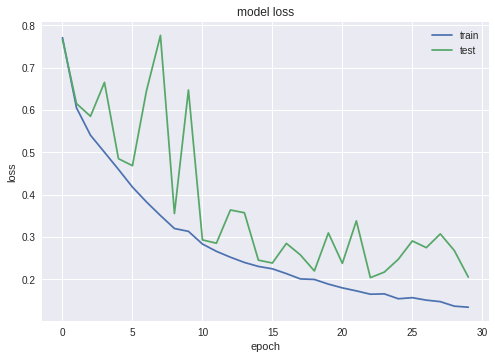

In [73]:
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [74]:
ROOT_PATH = "/content"
data_directory = os.path.join(ROOT_PATH, "test1")
test_im = os.listdir('test/')
m_test =len(test_im)
X_test = []
   
for i in tqdm(range(m_test)):
  img = plt.imread('test/'+str(i+1)+'.jpg')
  crop = crop_to_square(img)
  rsz = imresize(crop, size=(64,64))
  X_test += [rsz]


  0%|          | 0/12500 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):
 24%|██▍       | 3037/12500 [00:16<00:51, 184.40it/s]

100%|██████████| 12500/12500 [01:08<00:00, 182.93it/s]


In [75]:
!ls

datalab   model.json		 submission1.csv  test.zip  train.zip
model.h5  sample_submission.csv  test		  train


In [76]:
file_names[:10]

['dog.7961.jpg',
 'dog.10763.jpg',
 'cat.3598.jpg',
 'cat.11760.jpg',
 'dog.9009.jpg',
 'dog.2584.jpg',
 'cat.7590.jpg',
 'dog.10631.jpg',
 'dog.9983.jpg',
 'dog.11988.jpg']

In [0]:
X_test=np.array(X_test)


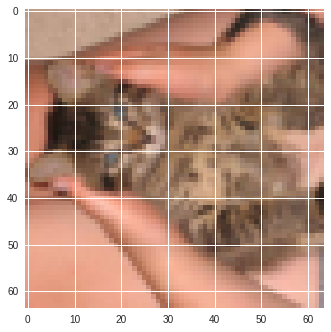

In [78]:
plt.imshow(X_test[5])

In [0]:

p=model.predict(X_test)

In [0]:
pred = np.insert(p, 0, np.arange(1, m_test+1), axis=1)

In [0]:
pred_df = pd.DataFrame(data=pred, columns=['id', 'label'], dtype='float32')
pred_df['id'] = pred_df['id'].astype('int64')

In [0]:
pred_df.to_csv('submission.csv', index=False)

In [98]:
!kaggle competitions submit -c dogs-vs-cats-redux-kernels-edition -f submission.csv -m "dogs and cats classifier using 8 convulational layes and 1 dense layer"

Successfully submitted to Dogs vs. Cats Redux: Kernels Edition

In [55]:

model_json  = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
ls -a

./        datalab/   .keras/     .nv/                  test1/
../       .forever/  .local/     .rnd                  test1.zip
.cache/   .ipython/  model.h5    sampleSubmission.csv  train/
.config/  .kaggle/   model.json  submission1.csv       train.zip


In [0]:
files.download('submission1.csv')  